# Application of Neural Net

##### Imports

In [45]:
from Value import *
from NeuralNet import *
from GraphViz import *
import matplotlib.pyplot as plt # type: ignore

##### Neural Net Constants

In [46]:
# inputs = [
#     [Value(1.0), Value(2.0), Value(3.0)],
#     [Value(16.0), Value(17.0), Value(18.0)],
#     [Value(12.0), Value(13.0), Value(14.0)]
# ]

# expected_outputs = [
#     [Value(2.0), Value(3.0), Value(4.0)],
#     [Value(18.0), Value(19.0), Value(22.0)],
#     [Value(13.0), Value(15.0), Value(18.0)]
# ]

inputs = [
    [Value(2.0), Value(3.0), Value(-1.0)],
    [Value(3.0), Value(-1.0), Value(0.5)],
    [Value(0.5), Value(1.0), Value(1.0)],
    [Value(1.0), Value(1.0), Value(-1.0)],
]
expected_outputs = [Value(1.0), Value(-1.0), Value(-1.0), Value(1.0)]  # desired targets

##### Loss Function (Mean Squared Error)

In [47]:
def loss_fn(outputs: list[list[Value]], predictions: list[list[Value]]) -> Value:
    loss = sum((y-x)**2 for output, prediction in zip(outputs, predictions) for x, y in zip(output, prediction))

    return loss if loss != 0 else Value(0.0)

##### Building Neural Net (with MLP)

Min Loss 0.0


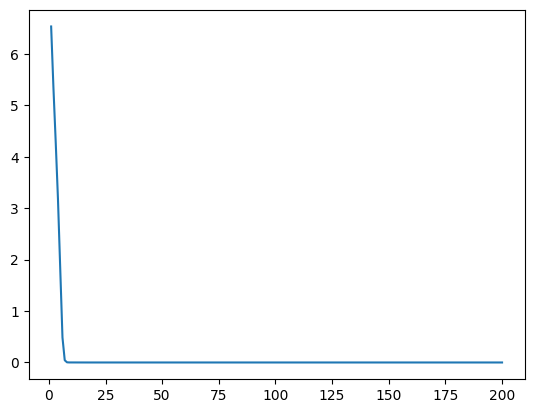

In [50]:
min_loss: Union[Value, None] = None
min_params: list[Value] = []

kill_switch: int = 1
losses: list[float] = []

nn = MLP(3, [4, 4, 4, 4, 1])

for k in range(200):
    nn_preds = [nn(x) for x in inputs]

    loss = loss_fn(nn_preds, [expected_outputs])

    if loss.data == 0:
        kill_switch = 0
        

    losses.append(loss.data)
    
    if k == 0:
        min_loss = loss

    if min_loss and loss.data < min_loss.data:
        min_loss = loss
        min_params = nn.parameters()

    for p in nn.parameters():
        p = 0.0
    # Module.zero_grad(nn.parameters())
        
    loss.backward()

    for p in nn.parameters():
        p.data += -0.05 * p.grad * kill_switch

    

print(f"Min Loss {min_loss.data if min_loss else 1000000}")

plt.plot(range(1, 201), losses) # type: ignore
plt.show() # type: ignore